In [121]:
import pandas as pd
df = pd.read_csv("csv/decessi_mensili.csv")
df.head()

,Data,Totale
0,2015-01-01,5026
1,2015-02-01,4662
2,2015-03-01,4126
3,2015-04-01,3907
4,2015-05-01,3788


In [122]:
df.Data = pd.to_datetime(df.Data)
df.head()

,Data,Totale
0,2015-01-01,5026
1,2015-02-01,4662
2,2015-03-01,4126
3,2015-04-01,3907
4,2015-05-01,3788


In [123]:
df.set_index('Data', inplace=True)
df.head()

,Totale
Data,
2015-01-01,5026
2015-02-01,4662
2015-03-01,4126
2015-04-01,3907
2015-05-01,3788


In [124]:
ts = df.Totale
ts.head()

Data
2015-01-01    5026
2015-02-01    4662
2015-03-01    4126
2015-04-01    3907
2015-05-01    3788
Name: Totale, dtype: int64

In [125]:
from datetime import datetime
from datetime import timedelta
start_date = datetime(2015,1,1)
end_date = datetime(2020,4,1)
lim_ts = ts[start_date:end_date]

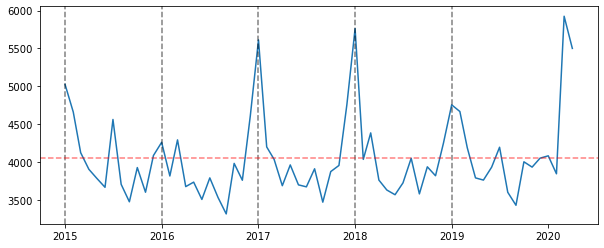

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(lim_ts)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.axhline(lim_ts.mean(), color='r', alpha=0.5, linestyle='--')

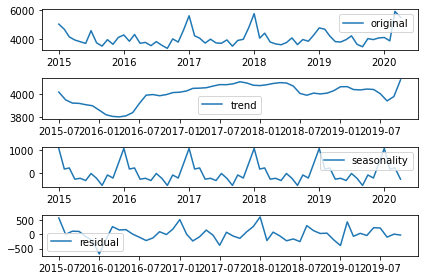

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period=12)

ts_trend = decomposition.trend #andamento della curva
ts_seasonal = decomposition.seasonal #stagionalità 
ts_residual = decomposition.resid #parti rimanenti
plt.subplot(411)
plt.plot(ts,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(ts_trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(ts_seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(ts_residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()

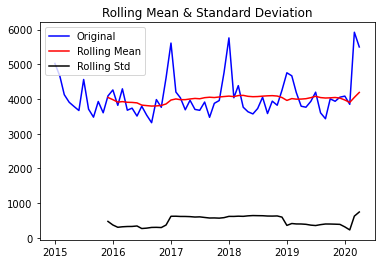

Results of Dickey-Fuller Test:
Test Statistic                 -4.655117
p-value                         0.000102
#Lags Used                      0.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64
X is stationary


In [128]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    alpha = 1e-3
    pvalue = dftest[1]
    if pvalue < alpha and test_statistic < critical_value:  # null hypothesis: x is non stationary
        print("X is stationary")
    else:
        print("X is not stationary")
    
test_stationarity(lim_ts)

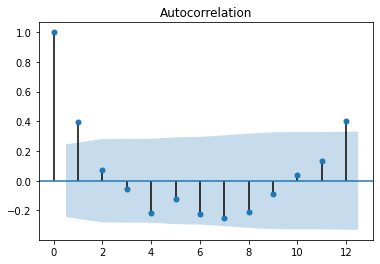

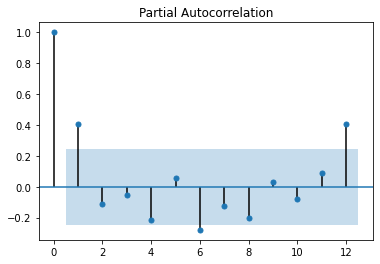

In [129]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts, lags =12)
plot_pacf(ts, lags =12)

plt.show()

In [136]:
from datetime import datetime
train_end = datetime(2017,12,1)
test_end = datetime (2020,2,1)

train = ts[:train_end]
test = ts[train_end + timedelta(days=1): test_end]


In [177]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(train, order=(12, 0, 12))
model_fit = model.fit(disp=1,solver='powell')
print(model_fit.summary())

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                               SARIMAX Results                                
Dep. Variable:                 Totale   No. Observations:                   36
Model:             SARIMAX(12, 0, 12)   Log Likelihood                -265.839
Date:                Thu, 16 Jul 2020   AIC                            581.678
Time:                        20:22:14   BIC                            621.265
Sample:                    01-01-2015   HQIC                           595.495
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3119      6.065     -0.051      0.959     -12.199      11.575
ar.L2          0.0870      2.986      0.029      0.977      -5.766       5.940
ar.L3          0.4152      5.222      0.080      0.9

c:\users\monta\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


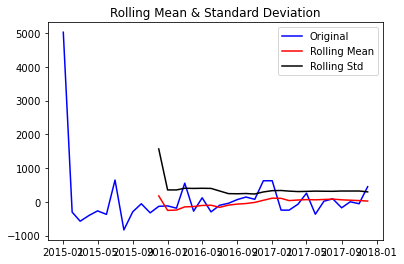

Results of Dickey-Fuller Test:
Test Statistic                -1.639002e+01
p-value                        2.699798e-29
#Lags Used                     0.000000e+00
Number of Observations Used    3.500000e+01
Critical Value (1%)           -3.632743e+00
Critical Value (5%)           -2.948510e+00
Critical Value (10%)          -2.613017e+00
dtype: float64
X is stationary


In [178]:
residuals = model_fit.resid
test_stationarity(residuals)

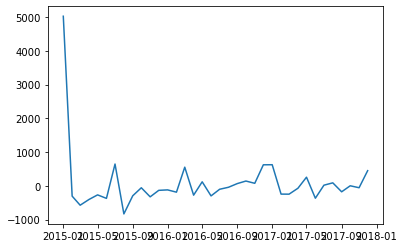

In [179]:
plt.plot(residuals)

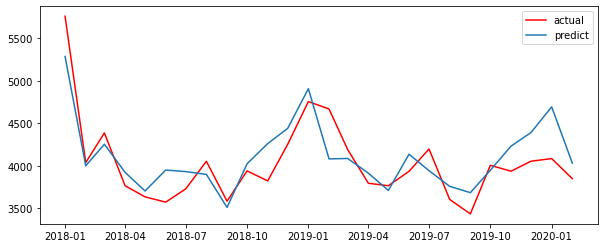

In [180]:
predictions = model_fit.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(test, label='actual', color='red')
plt.plot(predictions, label='predict')
plt.legend()

In [181]:
import numpy as np
from statsmodels.tools.eval_measures import rmse
nrmse = rmse(predictions, test)/(np.max(test)-np.min(test))
print("RMSE =" , nrmse)

RMSE = 0.11670305820209068


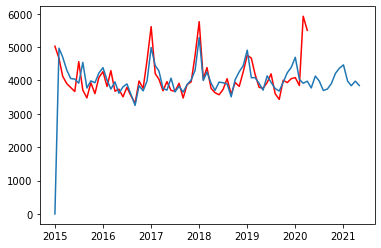

In [182]:
predictions = model_fit.predict(start=0, end=len(ts)+12) # facciamo lapredizione di un anno
plt.plot(ts, color='red')
plt.plot(predictions)

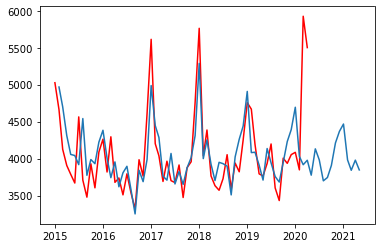

In [183]:
complete_predictions = predictions[1:]
plt.plot(ts, color='red')
plt.plot(complete_predictions)

In [184]:
complete_predictions['2020-04-01']

3977.9940868576577